# Inviscid Flow over a Cylinder

In [1]:
using PotentialFlow
using Plots
using Interact

pyplot()

clibrary(:colorbrewer)

:colorbrewer

$$
\newcommand{\compose}[2]{#1 \circ #2}
\newcommand{\ddp}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dpt}[1]{\ddp{#1}{t}}
\newcommand{\dd}[2]{\frac{\mathrm{d}#1}{\mathrm{d}#2}}
\newcommand{\ddt}[1]{\dd{#1}{t}}
\renewcommand{\vec}[1]{\boldsymbol{#1}}
\newcommand{\cross}{\times}
\newcommand{\abs}[1]{\left|#1\right|}
\renewcommand{\d}{\,\mathrm{d}}
\renewcommand{\div}{\nabla \cdot}
\renewcommand{\curl}{\nabla \cross}
\newcommand{\grad}{\nabla}
\newcommand{\lap}{\nabla^2}
\newcommand{\uvec}[1]{\vec{#1}}
\newcommand{\utangent}{\uvec{\tau}}
\newcommand{\unormal}{\uvec{n}}
\newcommand{\im}{\mathrm{i}}
\newcommand{\eu}{\mathrm{e}}
\newcommand{\pint}{\int}
\newcommand{\inv}[1]{{#1}^{-1}}
\newcommand{\conj}[1]{#1^\star}
\newcommand{\Res}[2]{\mathrm{Res}\left(#1,#2\right)}
\newcommand{\real}[1]{\mathrm{Re}\left\{#1\right\}}
\newcommand{\imag}[1]{\mathrm{Im}\left\{#1\right\}}
\newcommand{\normal}[1]{#1^\perp}
\newcommand{\tangent}[1]{#1^\parallel}
\newcommand{\residue}[2]{\mathrm{Res}\left(#1, #2\right)}
$$
Let's try to determine the force exerted on a cylinder in potential flow.
Since the flow is incompressible and irrotational, we can apply Bernoulli's equation:
$$
\nabla \left(\ddp{\varphi}{t} + \frac{p}{\rho} + \frac{1}{2}\abs{\vec{u}}^2 \right) = 0.
$$
We will assume:
- the flow is steady (i.e. $\ddp{\varphi}{t} = 0$)
- ambient pressure far away from the cylinder is $p_\infty$
- freestream velocity is $\vec{U}_\infty$.

This gives us
$$
\frac{p - p_\infty}{\rho} = \frac{1}{2}\left(\abs{\vec{U}_\infty}^2 - \abs{\vec{u}}^2\right).
$$
So once we determine the velocity along the surface, we just have to integrate pressure to find the force.

Recall that potential flow over a cylinder can be constructed as a doublet in a freestream:


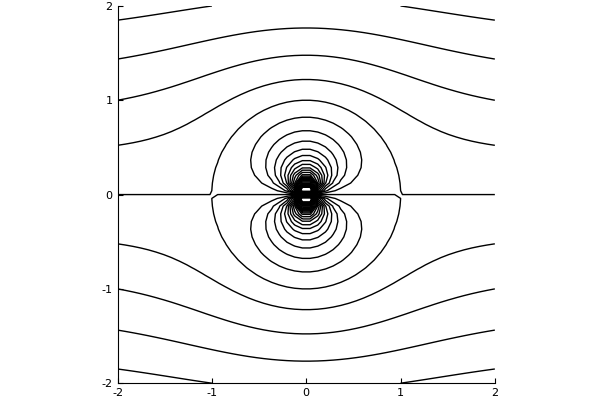

In [2]:
freestream = Freestream(1.0)
doublet = Doublet(0.0im, π)

cylinder = (freestream, doublet);

X = Y = linspace(-2, 2, 50)

streamlines(X, Y, cylinder, ratio = 1, levels = linspace(-10, 10, 51), color = cgrad([:black, :black]), cbar = false)


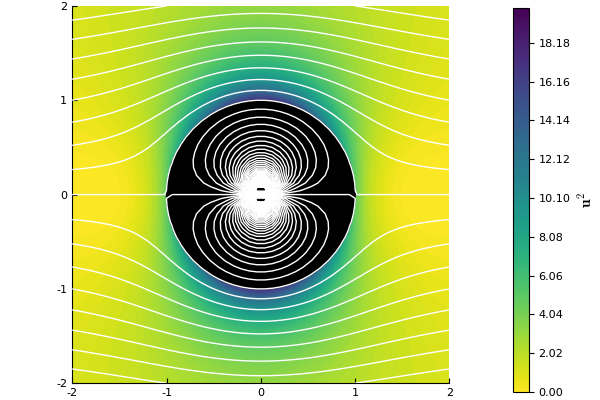

In [3]:
Z = [x + im*y for y in Y, x in X];
u_field = induce_velocity(Z, cylinder, 0.0);

field_plot = contourf(X, Y, abs2.(u_field), clim = (0, 20), color = :viridis_r, levels = linspace(0, 20, 100), colorbar_title = "\$\\bf{u}^2\$")
plot!(Shape(cos.(linspace(0, 2π, 100)), sin.(linspace(0, 2π, 100))), color = :black, ratio = 1, legend = false)
streamlines!(X, Y, (freestream, doublet), levels = linspace(-10, 10, 101), ratio = 1, color = cgrad([:white, :white]))

In [4]:
function cylinder_flow(X, Y, Γ = 0.0, ρ = 1.0)
    freestream = Freestream(1.0)
    doublet = Doublet(0.0im, π)
    vortex = Vortex.Point(0.0im, Γ)

    cylinder = (freestream, doublet, vortex);
    
    Z = [x + im*y for y in Y, x in X];
    u_field = induce_velocity(Z, cylinder, 0.0);
    
    θ = linspace(0, 2π, 100)
    cyl_surface = exp.(im*θ)
    n̂ = cyl_surface

    u = induce_velocity(cyl_surface, cylinder, 0.0)
    p = -0.5ρ*abs2.(u);
    
    p_min = minimum(p)
    
    l = @layout [ a{0.5w} grid(2,1)]
    plt = plot(layout = l, size = (800, 400))
    contourf!(X, Y, -0.5abs2.(u_field), clim = (p_min, 0), color = :viridis, levels = linspace(p_min, 0, 50), cbar = false, colorbar_title = "\$(p - p_\\infty)/\\rho\$")
    plot!(Shape(cos.(linspace(0, 2π, 100)), sin.(linspace(0, 2π, 100))), color = :black, ratio = 1, legend = false)
    streamlines!(X, Y, cylinder, levels = linspace(-10, 10, 71), ratio = 1, color = cgrad([:white, :white]))
    plot!(plt[2], rad2deg.(θ), p .* real.(n̂), xticks = 0:90:360, legend = false,
         ylabel = "\$(p - p_\\infty) (\\bf{n \\cdot i})\$", xlabel = "Angle")
    plot!(plt[3], rad2deg.(θ), p .* imag.(n̂), xticks = 0:90:360, legend = false,
         ylabel = "\$(p - p_\\infty) (\\bf{n \\cdot j})\$", xlabel = "Angle")
    u, p, plt
end

cylinder_flow (generic function with 3 methods)

Let's look at the pressure distribution along the cylinder's surface.
We see that it is completely symmetric in both axes, giving us no force on the cylider at all!


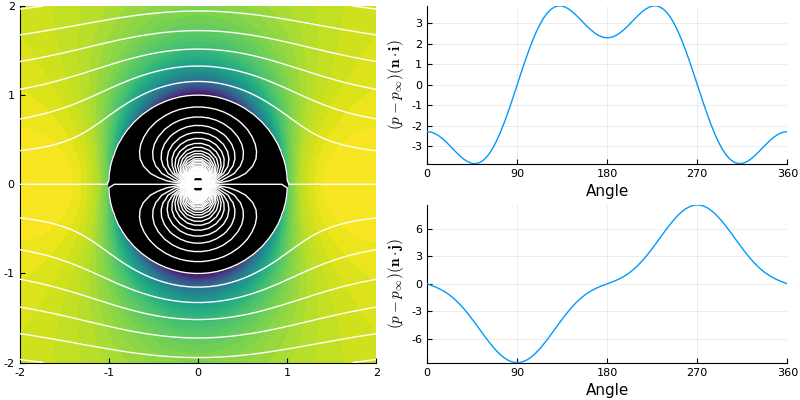

In [5]:
u, p, plt = cylinder_flow(X, Y)
plt

For there to be any force, we must find a way to break the symmetry.
Let's try to do that by placing a point vortex at the origin.

Interact.Options{:SelectionSlider,Any}(1: "input" = 0.0 Any , "Γ", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-20.0"=>-20.0,"-18.0"=>-18.0,"-16.0"=>-16.0,"-14.0"=>-14.0,"-12.0"=>-12.0,"-10.0"=>-10.0,"-8.0"=>-8.0,"-6.0"=>-6.0,"-4.0"=>-4.0,"-2.0"=>-2.0…), Dict{Any,Any}(Pair{Any,Any}(-16.0, "-16.0"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(16.0, "16.0"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(-20.0, "-20.0"),Pair{Any,Any}(-4.0, "-4.0"),Pair{Any,Any}(10.0, "10.0"),Pair{Any,Any}(8.0, "8.0"),Pair{Any,Any}(6.0, "6.0"),Pair{Any,Any}(-6.0, "-6.0")…)), Any[], Any[], true, "horizontal")


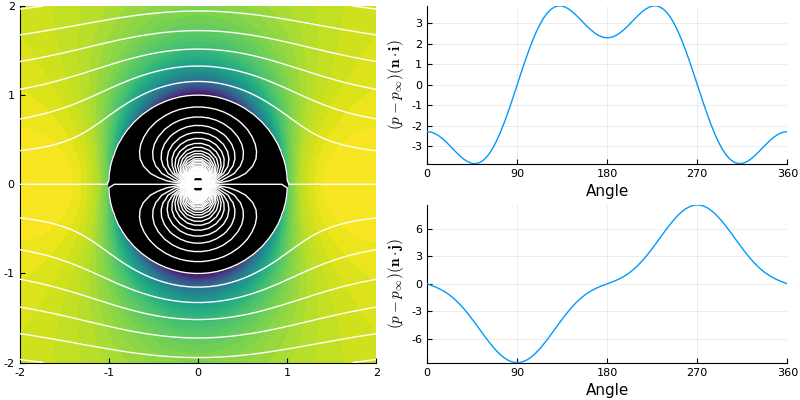

In [6]:
@manipulate for Γ in linspace(-20, 20, 21)
    u, p, plt = cylinder_flow(X, Y, Γ)
    plt
end

## Discussion


- Is there something similar we can do get predict a non-zero drag?
- Does the geometry of the cylinder matter?

- so how is this actually useful?